
<h3>This notebook will introduce and examine the Pandas DataFrame</h3>



In [1]:
#it is common to use the 'as' keyword when importing libraries to provide a more user friendly reference
#in the following code (so instead of typing pandas.read_csv() in next cell, we can type pd.read_csv())
import pandas as pd

In [2]:
#the read_csv function has many optional arguments to refine the import process as needed
#note, you can provide an explicit full directory path to the file (e.g. "/opt/notebooks/data/Salaries.csv", 
#or "C:\\Users\\somebody\data_files\Salries.csv", etc.) or a relative path.
#the dot followed by a slash is stating a relative path to the current directory (the one this notebook was launched from)

#this command loads a dataframe from file and assigns it to the "df" variable
df = pd.read_csv("./Salaries.csv")

In [3]:
#by default, head() will print the first 5 lines of a dataframe
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [4]:
#we can specify a different number to be displayed
df.head(8)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300


In [5]:
#tail works similarly, except it prints the last lines in a dataframe
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [5]:
#we can see what datatypes have been assigned to each column in a dataframe using the dtypes attribute
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
#we can cast the column to a different datatype if needed
#this is an example, only do this when you know if you need to
df.discipline = df.discipline.astype('category')
df.dtypes

rank               object
discipline       category
yrs.since.phd       int64
yrs.service         int64
sex                object
salary              int64
dtype: object

In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.size

468

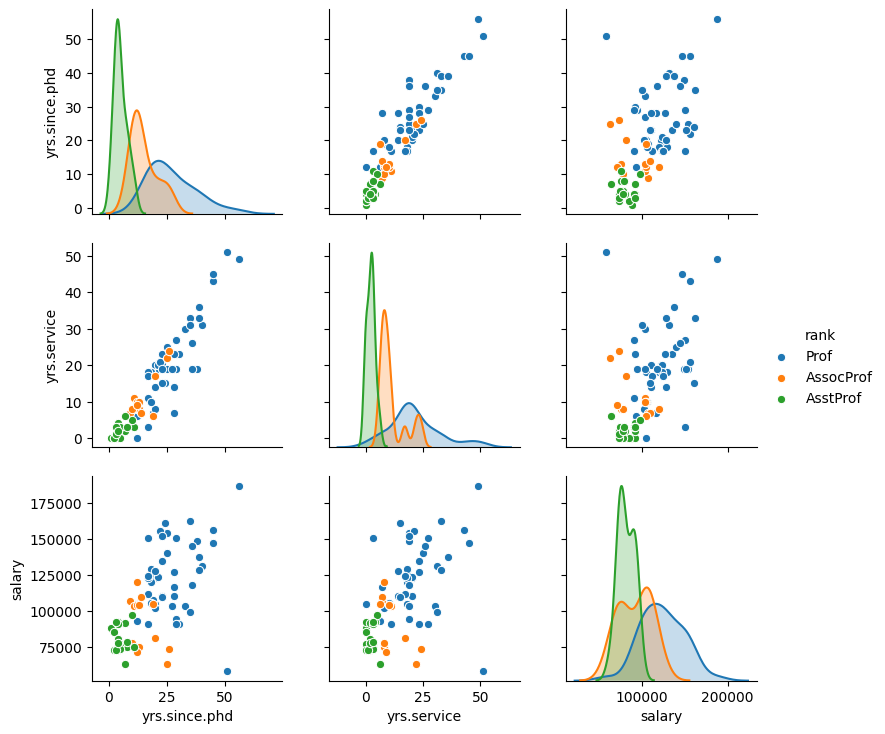

In [9]:
import seaborn as sns
sns.pairplot(df, hue='rank')

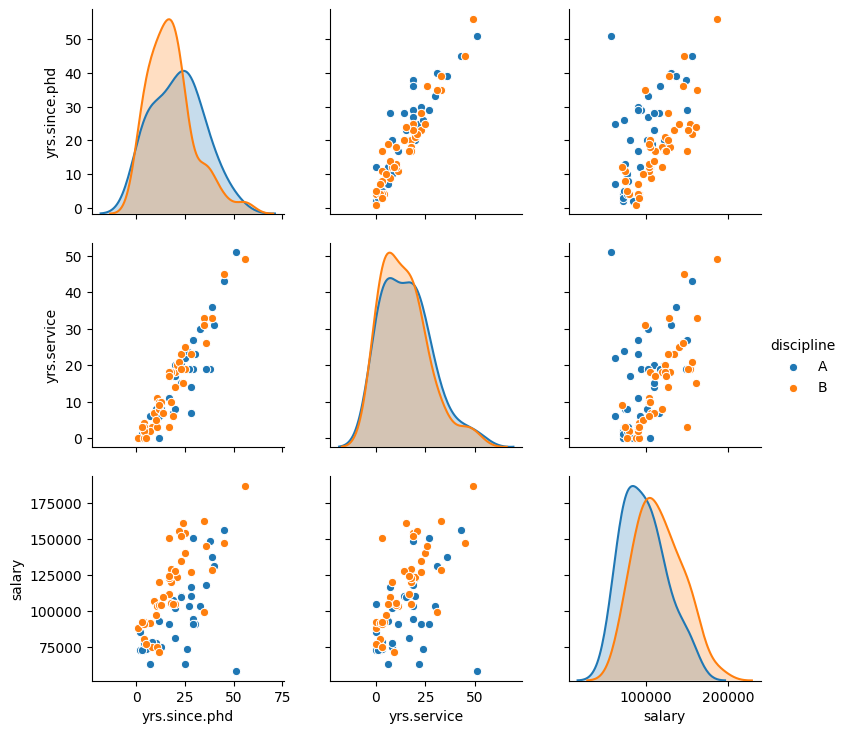

In [10]:
import seaborn as sns
sns.pairplot(df, hue='discipline')

In [11]:
#describe() provides some basic descriptive statistics for the numeric columns
df.describe()

,yrs.since.phd,yrs.service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


<h1>Subsetting by column(s)</h1>

In [34]:
#we can access a subset of a dataframe by column 
#as a pandas series
salaries_as_series = df['salary']
#or as another dataframe
salaries_as_dataframe = df[['salary']]

#the choice in desired return type often depends on what functionality we need from the resulting data
#or what is required by some other code we are planning to feed the result into (i.e., does it expect a dataframe or a series?)

In [37]:
#the dataframe version
salaries_as_dataframe

,salary
0,186960
1,93000
2,110515
3,131205
4,104800
...,...
73,105450
74,104542
75,124312
76,109954


In [46]:
type(salaries_as_dataframe)

pandas.core.frame.DataFrame

In [38]:
#the series version
salaries_as_series

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [45]:
type(salaries_as_series)

pandas.core.series.Series

In [39]:
#create a groupby object using the "rank" column as a key
grp = df.groupby('rank')
type(grp)

pandas.core.groupby.generic.DataFrameGroupBy

In [41]:
#get the average salary for the groups in the groupby object
avg_salaries_by_group = grp[['salary']].mean()
#use cell output to display rather than print
avg_salaries_by_group

,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


In [42]:
#take a look at the data type assigned to the variable by the previous code
print(type(avg_salaries_by_group))

<class 'pandas.core.frame.DataFrame'>


In [43]:
#try again, but reassign the variable with a slightly different call
avg_salaries_by_group = grp['salary'].mean()
avg_salaries_by_group

rank
AssocProf     91786.230769
AsstProf      81362.789474
Prof         123624.804348
Name: salary, dtype: float64

In [44]:
#note once again the change in type when we do not use the double brackets
type(avg_salaries_by_group)

pandas.core.series.Series

<H1>Filtering with Boolean index</H1>

In [55]:
#Select only the rows with a salary greater than 120000
df_sub = df[ df['salary'] < 120000 ]

In [56]:
#note the index numbers that had been present in df that are now missing in df_sub based on filtering
df_sub.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
4,Prof,B,20,18,Male,104800
6,AssocProf,A,20,17,Male,81285
8,Prof,A,29,19,Male,94350


In [66]:
#we need to understand what is happening here, so let's break it down into smaller parts
#we will assign the inner portion of the expression above to a variable called filter_mask
filter_mask = df['salary'] < 120000
print(type(filter_mask))
#note, we can use the head() function on the pandas series as well as the dataframe
print(filter_mask.head())
#now we see that the inner part of the expression returns a boolean value for each row based on evaluating the contents
#note, calling len() with a dataframe gives us the row count, we could also use df.shape[0]
#as df.shape returns a tuple of (#rows, #columns)
print("The length of the filter_mask is {}, and the lenght of the original df dataframe is {}".format(len(filter_mask), len(df)))

<class 'pandas.core.series.Series'>
0    False
1     True
2     True
3    False
4     True
Name: salary, dtype: bool
The length of the filter_mask is 78, and the lenght of the original df dataframe is 78


In [67]:
#when we provide the boolean filter mask to the dataframe using the following syntax, 
#we get only the rows that correspond to True in the mask
filtered_dataframe = df[filter_mask]
filtered_dataframe.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
4,Prof,B,20,18,Male,104800
6,AssocProf,A,20,17,Male,81285
8,Prof,A,29,19,Male,94350


In [59]:
#we can also use a more complex combination of Boolean expressions...
df_mid = df[(df['salary'] > 85000) & (df['sex'] =="Female") ]
df_mid.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
44,Prof,B,23,19,Female,151768
45,Prof,B,25,25,Female,140096
47,AssocProf,B,11,11,Female,103613


<h1>Slicing Rows</h1>

In [47]:
#we can "slice" rows from a dataframe with the following syntax
#REMEMEBER: zero index (first row is 0) and when slicing, the first specified row is inclusive and the second is 
#exclusive (results start at first specified row and go 'up to but not including' the second specified)
df[10:20]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


<h1>Using loc and iloc</h1>



In [73]:
#loc selects rows and/or columns by their labels (the row's integer index are accessible as labels)
df.loc[[10,11,12,13,14],['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750


In [75]:
#iloc selects rows and/or columns by position
df.iloc[10:16, [0,3,4,5]]


,rank,yrs.service,sex,salary
10,Prof,33,Male,128250
11,Prof,23,Male,134778
12,AsstProf,0,Male,88000
13,Prof,33,Male,162200
14,Prof,19,Male,153750
15,Prof,3,Male,150480


<h1>Sorting</h1>

In [79]:
# Create a new data frame from the original sorted by the column Salary (default is ascending order)
df_sorted = df.sort_values( by ='yrs.service')
df_sorted.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [82]:
#we can sort via multiple columns with subsorting and alter the order for each
df_sorted = df.sort_values( by =['yrs.service', 'salary'], ascending = [True, False])
df_sorted.head(10)


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500
